## Feature Engineering (FE) & EDA Assignment 3 

### Healthcare Fraud Detection

### Author: Chloe Du (jd3631)


### a) Paper Reading 

Predicting Healthcare Fraud in Medicaid: A Multidimensional Data Model and Analysis Techniques for Fraud Detection

1. The defination of feaud: “Fraud is the intentional deception or misrepresentation that an individual knows to be false or does not believe to be true and makes, knowing that the deception could result in some unauthorized benefit to himself/herself or some other person.”

2. Three main parties commit fraud: healthcare provider, beneficiaries (patients), insurance carrier

3. Two types of fraud: 1)) hit-and-run: perpetrators simply submit many fraudulent claims, receive payment, and disappear.// Hit-and-run fraud should exhibit an abnormally high number of claims or amounts in a very short time 2)) steal a little: perpetrators work to ensure fraud goes unnoticed and bill fraudulently over a long period of time. // The “steal a little, all the time” fraud may be discovered by an aggregating long period of time for data anomaly.

4. Seven common Medicaid fraud schemes: 
1) Phantom Billing (Submitting claims for services not provided) 2)Duplicate Billing (Submitting similar claims more than once) 3)Bill Padding (Submitting claims for unneeded ancillary services to Medicaid) 4)Upcoding (Billing for a service with a higher reimbursement rate than the service provided) 5)Unbundling (Submitting several claims for various services that should only be billed as one service) 6)Excessive or Unnecessary Services (Provides medically excessive or unnecessary services to a patient) 7)Kickbacks (A kickback is a form of negotiated bribery in which a commission is paid to the bribe-taker as a quid pro quo for services rendered)

5. Basic information: date(claim filed, service, paid), provider (executing, referring, billing), patient, insurer policy, treatment,diagnosis, claim type, drug, outcome, location.

6. New facts which can be further explored: Covered charges, Non-covered charges, Total charges, Units of service, Number of days between claim filled and paid, Number of days between service and claim paid, Distance between provider and patient, Number of days between service and claim filled, Covered price per unit, Total price per unit, and Treatment duration.

7. The expected focus for different 7 levels of fraud (descending order of usefulness): 1) Level 1 Single Claim, or Transaction: Unbundling,Excessive or Unnecessary Services; 2) Level 2 Patient / Provider: Duplicate Billing, Unbundling, Excessive or Unnecessary Services; 3)Level 3 a. Patient: Duplicate Billing, Unbundling, Phantom Billing, upcoding, Excessive or Unnecessary Services; b. Provider: Upcoding, Excessive or Unnecessary Service, Phantom Billing, Unbundling; 4)Level 4 a. Insurer Policy / Provider:Unbundling Excessive or Unnecessary Services,Phantom Billing ; b. Patient / Provider Group: except Kickbacks; 5)Level 5 Insurer Policy / Provider Group: except Duplicate Billing; 6) Level 6 a. Defined Patient Group: except Duplicate Billing; b. Provider Group: Upcoding, Excessive or Unnecessary Services; 7) Level 7 Multiparty, Criminal Conspiracies: Kickbacks, no Duplicate Billing  ((refer to Data models addressing levels of fraud))

8. two specific cases

9. Feature Engineering Strategies: What type of features can detect them? If a physician fraudulently creates many bills on one patient or one type of symptoms of some patients, the average number of bills per patient or per symptom will be much higher than those billed by other physicians. So by creating variables about the average bill size or bill count per patient or per symptom, we will be able to identify the outliers that are otherwise not noticed.

#### potential features that can be created

##### Features of medical resource abuse: 

1)Percentage of the patients that they were visited more than once in a month 2)The average of the prescript drug items in a claim 3)The average cost of a drug prescription claim 4)The ratio of the five expensive antibiotic prescriptions to all physician claims 5)The ratio of injection prescription to all physician claim 6)The ratio of total injection prescription to all physician claim 7)The ratio of total prescript antibiotic to all physician claims 8)The ratio of injected antibiotic to physician claim 9)The ratio of injected corticosteroid prescription to all physician claim

##### Features of fraudulent behaviors:

1) Percentage of reduplicative patients
2) Percentage of reduplicative patients-pharmacy
3) Percentage of reduplicative patients-pharmacy in a month
4) The average cost of a drug prescription claim
5) The ratio of claims referred to a high-cost pharmacy

### b) Exploratory Data Analysis (EDA)

### Part 1: To explore and gain insights from a dataset

In [1]:
#import necessary libraries
import numpy as np 
import pandas as pd

from scipy import stats  #for some statistics
from scipy.stats import norm, skew

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
%matplotlib inline

import warnings 
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn  #ignore warnings (from sklearn and seaborn)

from plotly.offline import init_notebook_mode, iplot
import plotly.figure_factory as ff
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
import plotly.graph_objs as go
import chart_studio.plotly as py
import plotly
from plotly.subplots import make_subplots
import plotly.express as px

from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True) 

In [2]:
# Now to import and put the dataset 
df = pd.read_csv("/Users/jiayangdu/Desktop/Columbia University /APAN 5420/inpatientCharges.csv")
df.shape
# This original dataset has 163,065 rows and 12 columns

(163065, 12)

In [6]:
df.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,$32963.07,$5777.24,$4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,$15131.85,$5787.57,$4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,$37560.37,$5434.95,$4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,$13998.28,$5417.56,$4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,$31633.27,$5658.33,$4851.44


In [7]:
##defination:
##DRG Definition:Classification system that groups similar clinical conditions (diagnoses) 
 #and the procedures furnished by the hospital during the stay.
##Total Discharges:The number of discharges billed by all providers for inpatient hospital services
#Average Covered Charges: The average charge of all provider's services covered by Medicare for discharges in the DRG. These will vary from hospital to hospital because of differences in hospital charge structures.
#Average Total Payments: The average total payments to all providers for the DRG including the MS-DRG amount, teaching,  disproportionate share, capital, and outlier payments for all cases. Also included in average total payments are co-payment and deductible amounts that the patient is responsible for and any additional payments by third parties for coordination of benefits.
#Average Medicare Payments: The average amount that Medicare pays to the provider for Medicare's share of the MS-DRG. Medicare payment amounts include the MS-DRG amount, teaching,  disproportionate share, capital, and outlier payments for all cases. Medicare payments DO NOT include beneficiary co-payments and deductible amounts nor any additional payments from third parties for coordination of benefits.

In [8]:
df.info()
# There is no missing values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 12 columns):
DRG Definition                          163065 non-null object
Provider Id                             163065 non-null int64
Provider Name                           163065 non-null object
Provider Street Address                 163065 non-null object
Provider City                           163065 non-null object
Provider State                          163065 non-null object
Provider Zip Code                       163065 non-null int64
Hospital Referral Region Description    163065 non-null object
 Total Discharges                       163065 non-null int64
 Average Covered Charges                163065 non-null object
 Average Total Payments                 163065 non-null object
Average Medicare Payments               163065 non-null object
dtypes: int64(3), object(9)
memory usage: 14.9+ MB


In [9]:
#something wrong with the columns, some are not callable, so I just rename them
df.columns= ['DRG Definition','Provider Id','Provider Name','Provider Street Address','Provider City','Provider State','Provider Zip Code','Hospital Referral Region Description','Total Discharges','Average Covered Charges($)','Average Total Payments($)','Average Medicare Payments($)']

From the above, we could find some problems here, 'Provider Id', 'Provider Zip Code' should be categorical; 'Average Covered Charges','Average Total Payments','Average Medicare Payments' should be numeric (float). Therefore, we will convert the data types of some columns. This will make further calculation easier. 

In [10]:
# convert datatype
df['Provider Id'] = df['Provider Id'].apply(lambda x:str(x))
df['Provider Zip Code'] = df['Provider Zip Code'].apply(lambda x:str(x))

num_cols = ['Average Covered Charges($)','Average Total Payments($)','Average Medicare Payments($)']
df[num_cols] = df[num_cols].replace({'\$':''}, regex = True)

In [11]:
df['Average Covered Charges($)'] = df['Average Covered Charges($)'].apply(lambda x:float(x))
df['Average Total Payments($)'] = df['Average Total Payments($)'].apply(lambda x:float(x))
df['Average Medicare Payments($)'] = df['Average Medicare Payments($)'].apply(lambda x:float(x))

In [12]:
#Take a quick look at some basic data
df.describe()

,Total Discharges,Average Covered Charges($),Average Total Payments($),Average Medicare Payments($)
count,163065.000000,163065.000000,163065.000000,163065.000000
mean,42.776304,36133.954224,9707.473804,8494.490964
std,51.104042,35065.365931,7664.642598,7309.467261
min,11.000000,2459.400000,2673.000000,1148.900000
25%,17.000000,15947.160000,5234.500000,4192.350000
50%,27.000000,25245.820000,7214.100000,6158.460000
75%,49.000000,43232.590000,11286.400000,10056.880000
max,3383.000000,929118.900000,156158.180000,154620.810000


In [13]:
# since the DRG Definition is too long, to make everything easy, we just extract the code from each DRG Definition 
df['DRG Code'] = df['DRG Definition'].apply(lambda x:x.split('-')[0])

In [14]:
#Take a quick look at some basic categorical data
df.describe(include=['O'])
# we could make sure that each DRG Definition has a unique code, and a code only stands for a DRG Definition definition

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,DRG Code
count,163065,163065,163065,163065,163065,163065,163065,163065,163065
unique,100,3337,3201,3326,1977,51,3053,306,100
top,194 - SIMPLE PNEUMONIA & PLEURISY W CC,100075,GOOD SAMARITAN HOSPITAL,100 MEDICAL CENTER DRIVE,CHICAGO,CA,76104,CA - Los Angeles,194
freq,3023,100,633,183,1505,13064,317,3653,3023


### Part 2: Feature Creation

#### New features 1 & 2: 'Avg Discharges by DRG', 'Diff Total Discharge by DRG'

1. To get Average Total Discharge by DRG, then compare total discharges of each provider for each DRG with it. This will help us to see the total discharges of which provider is much higher than those of providers  for similar clinical conditions (diagnoses). And we should look closely at those 'outstanding' providers to check if it committed fraud of 'steal a little' type. Moreover, we could also check the total charges of those providers whose total discharges is far below the peer average to see if it commited fraud of 'hit-and-run' type.

In [15]:
# to get the average number of discharges by DRG
table1=df['Total Discharges'].groupby(df['DRG Code']).mean().sort_values(ascending = False)
df1 = table1.to_frame()
df1.reset_index(inplace=True)
df1 = df1.rename(columns={'Total Discharges': 'Avg Discharges by DRG'})
df1.head(10)

,DRG Code,Avg Discharges by DRG
0,470,155.348000
1,885,146.383361
2,871,113.467994
3,392,83.001356
4,247,76.897727
5,292,75.190654
6,690,69.151890
7,291,69.072944
8,287,67.083333
9,194,65.626861


In [16]:
df1['Avg Discharges by DRG'].mean()

37.61664675008121

Text(0, 0.5, 'Avg Total Discharges')

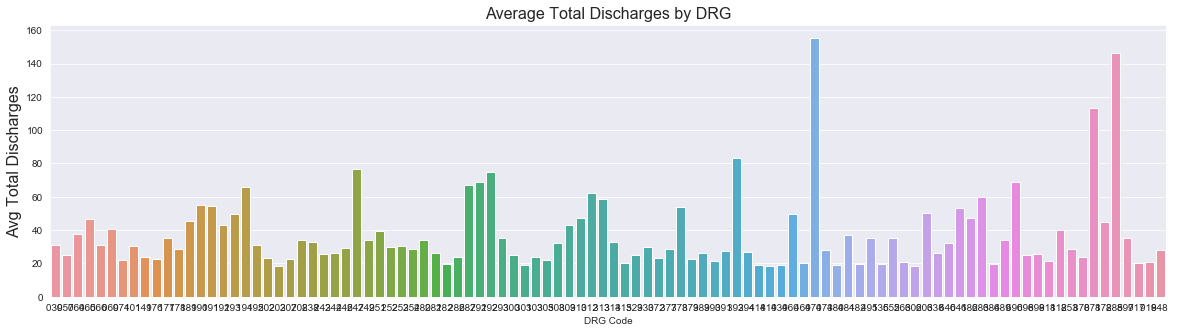

In [17]:
plt.figure(figsize=(20,5))
sns.barplot(x='DRG Code',y='Avg Discharges by DRG',data=df1)
plt.title('Average Total Discharges by DRG', fontsize=16)
plt.ylabel('Avg Total Discharges', fontsize=16)

In [18]:
# add this new feature to the original dataframe
df = pd.merge(df, df1, on='DRG Code', how='left')

In [19]:
# create the new feature called 'Diff Total Charge by DRG'
# to compare each provider's total discharge with the avergae discharge by DRG
df['Diff Total Discharge by DRG'] = df['Total Discharges'] - df['Avg Discharges by DRG']

In [20]:
# extract the following columns to see which provider is outstanding
cols = ['DRG Code','Provider Name','Total Discharges','Avg Discharges by DRG','Diff Total Discharge by DRG']
df2 = df[cols]
df2

,DRG Code,Provider Name,Total Discharges,Avg Discharges by DRG,Diff Total Discharge by DRG
0,039,SOUTHEAST ALABAMA MEDICAL CENTER,91,31.145505,59.854495
1,039,MARSHALL MEDICAL CENTER SOUTH,14,31.145505,-17.145505
2,039,ELIZA COFFEE MEMORIAL HOSPITAL,24,31.145505,-7.145505
3,039,ST VINCENT'S EAST,25,31.145505,-6.145505
4,039,SHELBY BAPTIST MEDICAL CENTER,18,31.145505,-13.145505
...,...,...,...,...,...
163060,948,SETON MEDICAL CENTER WILLIAMSON,23,28.115449,-5.115449
163061,948,METHODIST STONE OAK HOSPITAL,11,28.115449,-17.115449
163062,948,SETON MEDICAL CENTER HAYS,19,28.115449,-9.115449
163063,948,TEXAS REGIONAL MEDICAL CENTER AT SUNNYVALE,11,28.115449,-17.115449


In [21]:
# to extract the most outstanding provider whoes total discharge is far beyond its peers
df3 = df2.iloc[df2.groupby(['DRG Code']).apply(lambda x: x['Diff Total Discharge by DRG'].idxmax())]
df3.sort_values(by='Diff Total Discharge by DRG', ascending = False)
# the following providers are those we will focus on to check if they 'steal a little'

,DRG Code,Provider Name,Total Discharges,Avg Discharges by DRG,Diff Total Discharge by DRG
112969,470,HOSPITAL FOR SPECIAL SURGERY,3383,155.348000,3227.652000
157581,885,PARADISE VALLEY HOSPITAL,1696,146.383361,1549.616639
158518,897,ADCARE HOSPITAL OF WORCESTER INC,1571,35.248344,1535.751656
102239,392,FLORIDA HOSPITAL,1344,83.001356,1260.998644
80295,312,FLORIDA HOSPITAL,984,62.027098,921.972902
...,...,...,...,...,...
123974,602,FLORIDA HOSPITAL,84,18.744974,65.255026
14689,176,METHODIST HEALTHCARE MEMPHIS HOSPITALS,87,22.952722,64.047278
159062,917,HUNTSVILLE HOSPITAL,84,20.109134,63.890866
118780,482,CHRISTUS SPOHN HOSPITAL CORPUS CHRISTI,77,19.941346,57.058654


In [22]:
# Similarly, to extract those provider whoes total discharge is far below its peer average
df4 = df2.iloc[df2.groupby(['DRG Code']).apply(lambda x: x['Diff Total Discharge by DRG'].idxmin())]
df4.sort_values(by='Diff Total Discharge by DRG', ascending = True)
# the following providers are those we will focus to check if they 'hit and run'

,DRG Code,Provider Name,Total Discharges,Avg Discharges by DRG,Diff Total Discharge by DRG
111299,470,UNIV OF SOUTH ALABAMA MEDICAL CENTER,11,155.348000,-144.348000
154750,885,MOUNT SINAI MEDICAL CENTER,11,146.383361,-135.383361
152220,871,MIZELL MEMORIAL HOSPITAL,11,113.467994,-102.467994
101900,392,MEDICAL PARK HOSPITAL,11,83.001356,-72.001356
46957,247,POMONA VALLEY HOSPITAL MEDICAL CENTER,11,76.897727,-65.897727
...,...,...,...,...,...
106225,418,MARSHALL MEDICAL CENTER NORTH,11,19.006257,-8.006257
108052,439,MARSHALL MEDICAL CENTER SOUTH,11,18.793717,-7.793717
122862,602,ELIZA COFFEE MEMORIAL HOSPITAL,11,18.744974,-7.744974
107191,419,RIVERVIEW REGIONAL MEDICAL CENTER,11,18.549943,-7.549943


#### Total discharges - provider - DRG - State - city

#### New Features 3 - 13: 'Total Discharges by provider', 'Total Discharges by Provider by DRG by State ', 'Average Discharges by DRG by State', 'Total Discharges  by DRG by State', 'Average Discharges  by DRG by State by City', 'Total Discharges  by DRG by State by Citry','% discharges by DRG by State','% discharges by provider', '% discharges by DRG by State', 'diff discharge by DRG by State','diff discharge by DRG by State by city'.

2. To get average discharges by provider by DRG then by state and then compare this to the average discharges by DRG by state. This will help us to check which regional branch of each provider is the problematic.

In [23]:
# to get total discharges by different provider
table2=df['Total Discharges'].groupby(df['Provider Name']).sum().sort_values(ascending = False)
df5 = table2.to_frame()
df5.reset_index(inplace=True)
df5 = df5.rename(columns={'Total Discharges': 'Total Discharges by provider'})

## add this new feature to the original dataframe
df = pd.merge(df, df5, on='Provider Name', how='left')

df5.head(5)

,Provider Name,Total Discharges by provider
0,GOOD SAMARITAN HOSPITAL,27592
1,FLORIDA HOSPITAL,25828
2,BAPTIST MEDICAL CENTER,18208
3,METHODIST HOSPITAL,17638
4,NEW YORK-PRESBYTERIAN HOSPITAL,16834


In [24]:
# to get the total discharges by provider by DRG then by state
table3 = df.groupby(['Provider Name','DRG Code','Provider State'])['Total Discharges'].apply(lambda x : x.astype(int).sum())
df6 = table3.to_frame()
df6.reset_index(inplace=True)
df6 = df6.rename(columns={'Total Discharges': 'Total Discharges by Provider by DRG by State'})
df6

,Provider Name,DRG Code,Provider State,Total Discharges by Provider by DRG by State
0,ABBEVILLE GENERAL HOSPITAL,178,LA,12
1,ABBEVILLE GENERAL HOSPITAL,192,LA,15
2,ABBEVILLE GENERAL HOSPITAL,194,LA,48
3,ABBEVILLE GENERAL HOSPITAL,195,LA,23
4,ABBEVILLE GENERAL HOSPITAL,202,LA,16
...,...,...,...,...
162608,YUMA REGIONAL MEDICAL CENTER,871,AZ,202
162609,YUMA REGIONAL MEDICAL CENTER,872,AZ,99
162610,YUMA REGIONAL MEDICAL CENTER,918,AZ,18
162611,YUMA REGIONAL MEDICAL CENTER,948,AZ,19


In [25]:
# to add this new feature in the original dataframe
df = pd.merge(df, df6, on=['Provider Name','DRG Code','Provider State'], how='left')

In [26]:
#### to create some standards(which can be used to do comparison)
# to get the average discharges by DRG then by state as a standard
table5 = df.groupby(['DRG Code','Provider State'])['Total Discharges'].apply(lambda x : x.astype(int).mean())
df7 = table5.to_frame()
df7.reset_index(inplace=True)
df7 = df7.rename(columns={'Total Discharges': 'Average Discharges by DRG by State'})

df = pd.merge(df, df7, on=['DRG Code','Provider State'], how='left')
# to get the total discharges by DRG then by state as a standard
table6 = df.groupby(['DRG Code','Provider State'])['Total Discharges'].apply(lambda x : x.astype(int).sum())
df8 = table6.to_frame()
df8.reset_index(inplace=True)
df8 = df8.rename(columns={'Total Discharges': 'Total Discharges by DRG by State'})

df = pd.merge(df, df8, on=['DRG Code','Provider State'], how='left')
# to get the average discharges by DRG by state then by city as a standard
table7 = df.groupby(['DRG Code','Provider State','Provider City'])['Total Discharges'].apply(lambda x : x.astype(int).mean())
df9 = table7.to_frame()
df9.reset_index(inplace=True)
df9 = df9.rename(columns={'Total Discharges': 'Average Discharges by DRG by State by City'})

df = pd.merge(df, df9, on=['DRG Code','Provider State','Provider City'], how='left')
# to get the total discharges by DRG by state then by state as a standard
table8 = df.groupby(['DRG Code','Provider State','Provider City'])['Total Discharges'].apply(lambda x : x.astype(int).sum())
df10 = table8.to_frame()
df10.reset_index(inplace=True)
df10 = df10.rename(columns={'Total Discharges': 'Total Discharges by DRG by State by City'})

df = pd.merge(df, df10, on=['DRG Code','Provider State','Provider City'], how='left')

df.head(3)

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges($),...,Average Medicare Payments($),DRG Code,Avg Discharges by DRG,Diff Total Discharge by DRG,Total Discharges by provider,Total Discharges by Provider by DRG by State,Average Discharges by DRG by State,Total Discharges by DRG by State,Average Discharges by DRG by State by City,Total Discharges by DRG by State by City
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,...,4763.73,039,31.145505,59.854495,5405,91,38.217391,879,68.0,136
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,...,4976.71,039,31.145505,-17.145505,1419,14,38.217391,879,14.0,14
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,...,4453.79,039,31.145505,-7.145505,3901,24,38.217391,879,24.0,24


The meaning of column 'Total discharges' is actually 'Total Discharges by Provider by DRG by State by city'

In [27]:
# 1. to get the new feature '% discharges by DRG by State', this represents for a specific DRG(diagnose),
# how much dose this provider's discharges in certain specific state account for the total dischargers of this DRG in this state.
df['% discharges by DRG by State'] = df['Total Discharges by Provider by DRG by State'] / df['Total Discharges by DRG by State']

#2. to get the new feature '%discharges by provider', this shows for certain specific DRG,
# how much dose this provider's discharges in certain specific state account for this providers' total discharges.
df['% discharges by provider'] = df['Total Discharges by Provider by DRG by State'] / df['Total Discharges by provider']

#3. to get the new feature '% discharges by DRG by State by city', this represents for a specific DRG(diagnose),
# how much dose this provider's discharges in certain specific city account for the toatal dischargers of this DRG in this city.
df['% discharges by DRG by State'] = df['Total Discharges by Provider by DRG by State'] / df['Total Discharges by DRG by State by City']

#4. to get the new feature 'diff discharge by DRG by State', this could see how is this provider's performance for this DRG
# compared to the peer average for this DRG in this state 
df['diff discharge by DRG by State'] = df['Total Discharges by Provider by DRG by State'] - df['Average Discharges by DRG by State']

#4. to get the new feature 'diff discharge by DRG by State by city', this could see how is this provider's performance for this DRG
# compared to the peer average for this DRG in this city
df['diff discharge by DRG by State by city'] = df['Total Discharges'] - df['Average Discharges by DRG by State by City']

In [28]:
df.head(3)

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges($),...,Total Discharges by provider,Total Discharges by Provider by DRG by State,Average Discharges by DRG by State,Total Discharges by DRG by State,Average Discharges by DRG by State by City,Total Discharges by DRG by State by City,% discharges by DRG by State,% discharges by provider,diff discharge by DRG by State,diff discharge by DRG by State by city
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,...,5405,91,38.217391,879,68.0,136,0.669118,0.016836,52.782609,23.0
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,...,1419,14,38.217391,879,14.0,14,1.000000,0.009866,-24.217391,0.0
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,...,3901,24,38.217391,879,24.0,24,1.000000,0.006152,-14.217391,0.0


#### New Feature 14: Medicare Coverage rate

3. We could check if there is fraud caused by making medicare pay more than the required bill amount (where ratio >1)

In [29]:
df['Medicare Coverage rate'] = df['Average Medicare Payments($)'] / df['Average Total Payments($)']

#### Average Covered Charges

#### New Feature 15-19: 'Average Covered Charges per discharge by Provider', 'Average Covered Charges per discharge by DRG' , 'Average Covered Charges per discharge by DRG by State',  'diff avg covered charges by DRG', 'diff avg covered charges by DRG by State'

4. First, we could create a new feature 'Average Covered Charges per discharge by Provider', and 'Average Covered Charges per discharge by DRG' as a peer standard. Then, we could discover the difference between these two features to identify the outliers which is highly likely to commit defraud. 

In [30]:
#new features: 'Average Covered Charges per discharge by provider'
df['Average Covered Charges per Discharge by Provider'] = df['Average Covered Charges($)'] / df['Total Discharges']

#new features: Average Covered Charges per discharge by DRG
# sum - Total Discharges by DRG
table9 = df.groupby(['DRG Code'])['Total Discharges'].apply(lambda x : x.astype(int).sum())
df11 = table9.to_frame()
df11.reset_index(inplace=True)
df11 = df11.rename(columns={'Total Discharges': 'sum - Total Discharges by DRG'})

# sum - Average Covered Charges by DRG
table10 = df.groupby(['DRG Code'])['Average Covered Charges($)'].apply(lambda x : x.astype(float).sum())
df12 = table10.to_frame()
df12.reset_index(inplace=True)
df12 = df12.rename(columns={'Average Covered Charges($)': 'sum - Average Covered Charges by DRG'})


df12 = pd.merge(df11, df12, on=['DRG Code'], how='left')

#new features: Average Covered Charges per discharge by DRG
df12['Average Covered Charges per discharge by DRG'] = df12['sum - Average Covered Charges by DRG'] / df12['sum - Total Discharges by DRG']
df12.head(3)

,DRG Code,sum - Total Discharges by DRG,sum - Average Covered Charges by DRG,Average Covered Charges per discharge by DRG
0,039,33606,32890061.73,978.696118
1,057,30212,29193618.04,966.292137
2,064,62093,80548778.68,1297.228008


However, the charging standard may vary with the different states, so the following featureswill take state into account. Especially, the column 'Total Discharges' actually represents the total discharges by provider by state by city.

In [31]:
#new features: Average Covered Charges per discharge by DRG by State 
# sum - Average Covered Charges by DRG by State
table11 = df.groupby(['DRG Code','Provider State'])['Average Covered Charges($)'].apply(lambda x : x.astype(float).sum())
df13 = table11.to_frame()
df13.reset_index(inplace=True)
df13 = df13.rename(columns={'Average Covered Charges($)': 'sum - Average Covered Charges by DRG by State'})


df13 = pd.merge(df8, df13, on=['DRG Code','Provider State'], how='left')

df13['Average Covered Charges per discharge by DRG by State'] = df13['sum - Average Covered Charges by DRG by State'] / df13['Total Discharges by DRG by State']
df13.head(3)

,DRG Code,Provider State,Total Discharges by DRG by State,sum - Average Covered Charges by DRG by State,Average Covered Charges per discharge by DRG by State
0,039,AK,23,34805.13,1513.266522
1,039,AL,879,737022.05,838.477873
2,039,AR,652,439412.21,673.945107


In [32]:
# merge the above table with the original dataframe
df = pd.merge(df, df12, on=['DRG Code'], how='left')
df = pd.merge(df, df13, on=['DRG Code','Provider State'], how='left')

In [33]:
#create new feature 'diff avg covered charges by DRG'
df['diff avg covered charges per discharge by DRG'] = df['Average Covered Charges per Discharge by Provider'] - df['Average Covered Charges per discharge by DRG']
df['diff avg covered charges per discharge by DRG by State'] = df['Average Covered Charges per Discharge by Provider'] - df['Average Covered Charges per discharge by DRG by State']

#### Average Total Payments

In [34]:
#new features: 'sum - Average Total Payments by Provider'
table12 = df.groupby(['Provider Name'])['Average Total Payments($)'].apply(lambda x : x.astype(float).sum())
df14 = table12.to_frame()
df14.reset_index(inplace=True)
df14 = df14.rename(columns={'Average Total Payments($)': 'sum - Average Total Payments by Provider'})

#new feature: 'sum - Average Total Payments by DRG'
table13 = df.groupby(['DRG Code'])['Average Total Payments($)'].apply(lambda x : x.astype(float).sum())
df15 = table13.to_frame()
df15.reset_index(inplace=True)
df15 = df15.rename(columns={'Average Total Payments($)': 'sum - Average Total Payments by DRG'})

#new feature: 'sum - Average Total Payments by DRG by State'
table14 = df.groupby(['DRG Code','Provider State'])['Average Total Payments($)'].apply(lambda x : x.astype(float).sum())
df16 = table14.to_frame()
df16.reset_index(inplace=True)
df16 = df16.rename(columns={'Average Total Payments($)': 'sum - Average Total Payments by DRG by State'})

#new feature: 'mean - Average Total Payments by DRG'
table15 = df.groupby(['DRG Code'])['Average Total Payments($)'].apply(lambda x : x.astype(float).mean())
df17 = table15.to_frame()
df17.reset_index(inplace=True)
df17 = df17.rename(columns={'Average Total Payments($)': 'mean - Average Total Payments by DRG'})

#new feature: 'mean - Average Total Payments by DRG by State'
table16 = df.groupby(['DRG Code','Provider State'])['Average Total Payments($)'].apply(lambda x : x.astype(float).mean())
df18 = table16.to_frame()
df18.reset_index(inplace=True)
df18 = df18.rename(columns={'Average Total Payments($)': 'mean - Average Total Payments by DRG by State'})

df = pd.merge(df, df14, on=['Provider Name'], how='left')
df = pd.merge(df, df15, on=['DRG Code'], how='left')
df = pd.merge(df, df16, on=['DRG Code','Provider State'], how='left')
df = pd.merge(df, df17, on=['DRG Code'], how='left')
df = pd.merge(df, df18, on=['DRG Code','Provider State'], how='left')

In [35]:
df.columns

Index(['DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region Description',
       'Total Discharges', 'Average Covered Charges($)',
       'Average Total Payments($)', 'Average Medicare Payments($)', 'DRG Code',
       'Avg Discharges by DRG', 'Diff Total Discharge by DRG',
       'Total Discharges by provider',
       'Total Discharges by Provider by DRG by State',
       'Average Discharges by DRG by State',
       'Total Discharges by DRG by State_x',
       'Average Discharges by DRG by State by City',
       'Total Discharges by DRG by State by City',
       '% discharges by DRG by State', '% discharges by provider',
       'diff discharge by DRG by State',
       'diff discharge by DRG by State by city', 'Medicare Coverage rate',
       'Average Covered Charges per Discharge by Provider',
       'sum - Total Discharges by DRG', 'sum - Average Covered Charges by D

### PART 3: EDA

#### 1. To explore the cost of each DRG(diagnose)

In [36]:
df12 = pd.merge(df12, df1, on='DRG Code', how = 'left')
df17 = pd.merge(df17, df12,on='DRG Code', how = 'left')

In [37]:
df19 = df[['DRG Code','DRG Definition']]
df12 = pd.merge(df12, df19, on='DRG Code', how='left')
df17 = pd.merge(df17, df19, on='DRG Code', how='left')

From the following two figures, we could find it is interesting that for some DRG with high covered charge, the number of discharges is less. On the contrary, the number of discharges for some DRG less covered by Medicare is pretty high. This may suggest that less the number of discharges for a DRG is, the more difficult this DRG is treated, the more expensive to treat that DRG, the more Medicare tend to cover. 

Text(0, 0.5, 'Average Covered Charges per discharge')

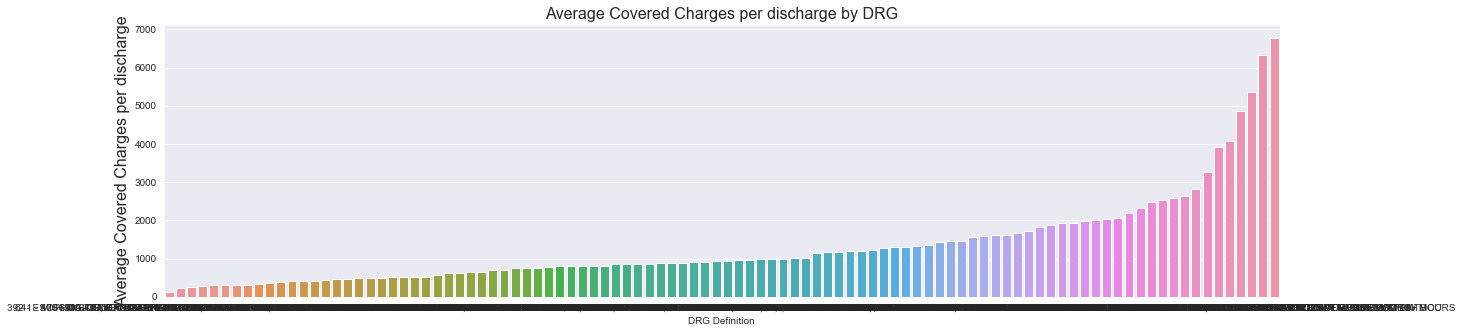

In [38]:
plt.figure(figsize=(20,5))
sns.barplot(x='DRG Definition',y='Average Covered Charges per discharge by DRG',data=df12.sort_values('Average Covered Charges per discharge by DRG'))
plt.title('Average Covered Charges per discharge by DRG', fontsize=16)
plt.ylabel('Average Covered Charges per discharge', fontsize=16)

Text(0, 0.5, 'Mean of Total Discharges')

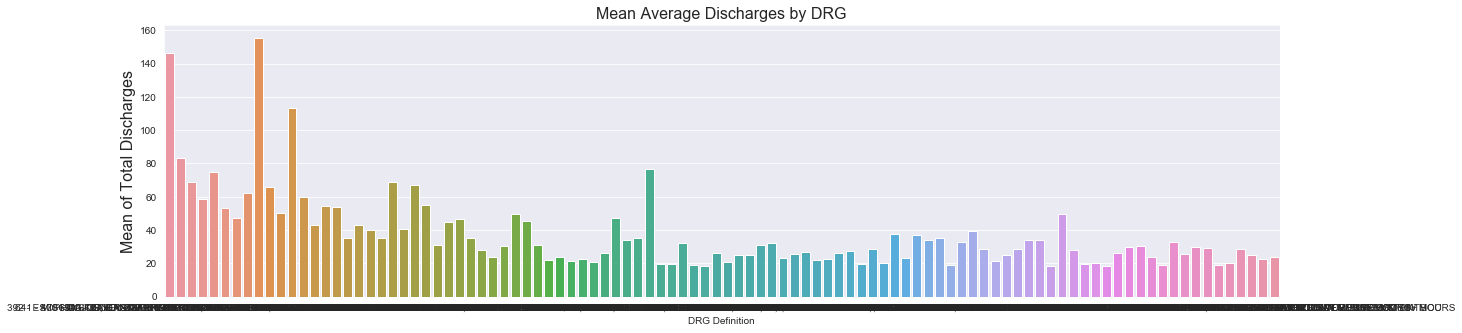

In [39]:
plt.figure(figsize=(20,5))
sns.barplot(x='DRG Definition',y='Avg Discharges by DRG',data=df12.sort_values('Average Covered Charges per discharge by DRG'))
plt.title('Mean Average Discharges by DRG', fontsize=16)
plt.ylabel('Mean of Total Discharges', fontsize=16)

When we have a close look, from the following three diagrams: Firstly, the cost of some DRGs is much higher than others. Secondly, the covered charges for some costly DRGs is less than that for relatively cheap DRGs. This suggests how much Medicare will cover does not fully depend on the costs of DRGs. For some cheap DRGs, Medicare's coverage rate is high, but for some expensive DRGs, Medicare may cover relatively less. Thirdly, we could find costly DRGs are relatively less common (with less number of discharges) or Some costly DRG are difficult to treat so that the number of discharges are little.

Text(0, 0.5, 'Mean of Average Total Payments')

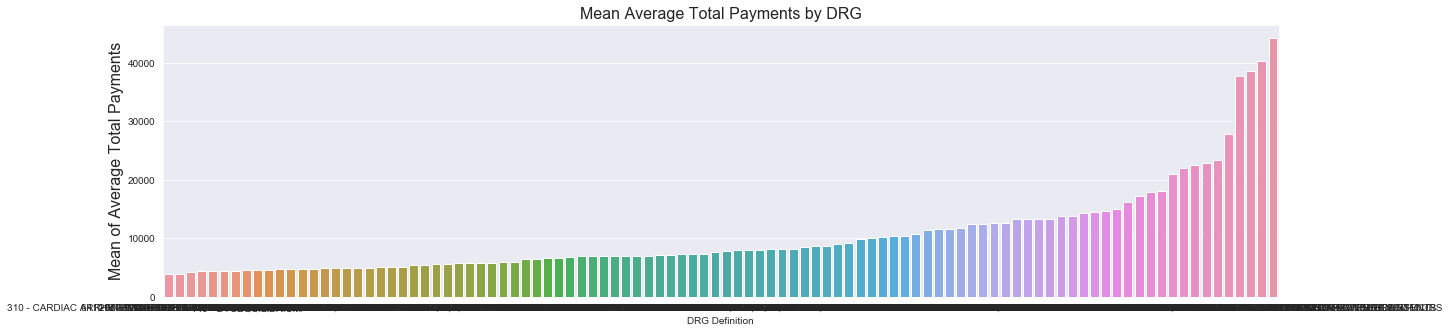

In [40]:
plt.figure(figsize=(20,5))
sns.barplot(x='DRG Definition', y='mean - Average Total Payments by DRG', 
            data=df17.sort_values('mean - Average Total Payments by DRG'))
plt.title('Mean Average Total Payments by DRG', fontsize=16)
plt.ylabel('Mean of Average Total Payments', fontsize=16)

Text(0, 0.5, 'Average Covered Charges per discharge')

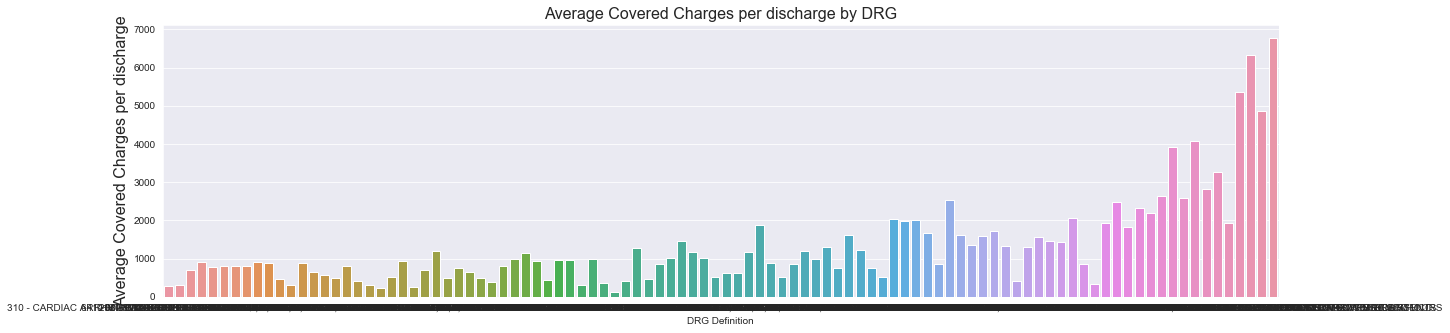

In [41]:
plt.figure(figsize=(20,5))
sns.barplot(x='DRG Definition', y='Average Covered Charges per discharge by DRG', 
            data=df17.sort_values('mean - Average Total Payments by DRG'))
plt.title('Average Covered Charges per discharge by DRG', fontsize=16)
plt.ylabel('Average Covered Charges per discharge', fontsize=16)

Text(0, 0.5, 'Mean of Total Discharges')

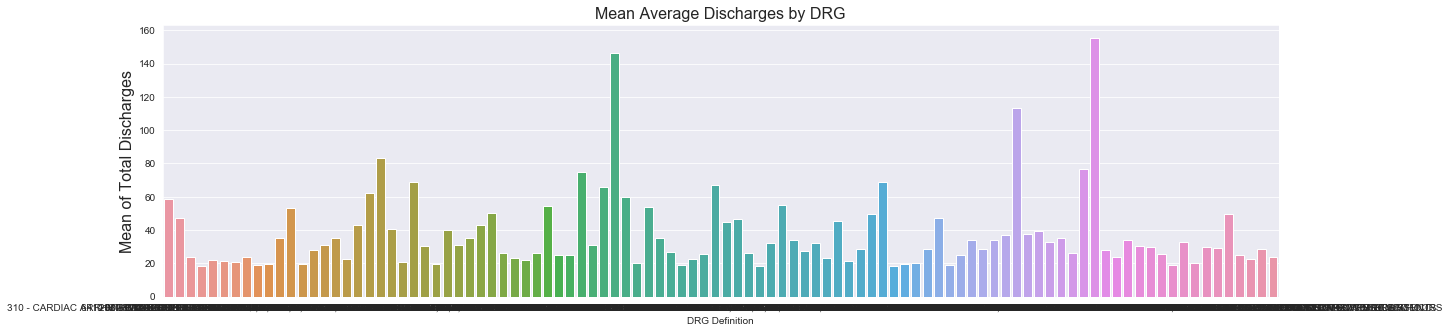

In [42]:
plt.figure(figsize=(20,5))
sns.barplot(x='DRG Definition',y='Avg Discharges by DRG',data=df17.sort_values('mean - Average Total Payments by DRG'))
plt.title('Mean Average Discharges by DRG', fontsize=16)
plt.ylabel('Mean of Total Discharges', fontsize=16)

#### 2. To explore the relationship between DRG and States

From the following figure: Firstly, we could find payments for each DRG vary from state to state. Secondly, the payments is different for different DRG in each state. And some states noticeably charge more for each DRG than others (The lighter the color, the higher the charge) such as CA, NY, MD, DC. On the contrary, in MT and IA state, the charges are relatively low. Then, we will have a closer look at these four states. 

The following some steps draw on kaggle：https://www.kaggle.com/mlesna/data-analysis-and-visualizations/data

In [43]:
import csv, sqlite3

In [44]:
def unlock_db(db_filename):
    """Replace db_filename with the name of the SQLite database."""
    connection = sqlite3.connect(db_filename)
    connection.commit()
    connection.close()
    
unlock_db('hospital_charges.db')

In [45]:
conn = sqlite3.connect('hospital_charges.db')
_df = df.copy()

_df['Average Covered Charges($)'] = _df['Average Covered Charges($)'].apply(lambda x:str(x))
_df['Average Total Payments($)'] = _df['Average Total Payments($)'].apply(lambda x:str(x))
_df['Average Medicare Payments($)'] = _df['Average Medicare Payments($)'].apply(lambda x:str(x))

_df.columns = [column.strip() for column in _df.columns]
for column in ['Average Covered Charges($)', 'Average Total Payments($)', 'Average Medicare Payments($)']:
    _df[column] = _df[column].map(lambda x: x[1:])
    _df[column] = pd.to_numeric(_df[column])
_df.to_sql('hospital_charges', conn, if_exists='replace', index=False)
conn.close()

In [46]:
conn = sqlite3.connect('hospital_charges.db')

query = '''
SELECT `DRG Definition`, `Provider State` as providerState, t.maxAvgPaymentPerDRG
FROM hospital_charges hc
INNER JOIN (
    SELECT `DRG Definition` as drg, MAX(`Average Total Payments($)`) as maxAvgPaymentPerDRG
    FROM hospital_charges
    GROUP BY `DRG Definition`
) t
ON hc.`DRG Definition` == t.drg AND hc.`Average Total Payments($)` == t.maxAvgPaymentPerDRG
ORDER BY providerState ASC
'''

cursor = conn.execute(query)
results = [record for record in cursor]
conn.close()

In [47]:
_df = pd.DataFrame(results, columns=['DRG', 'ProviderState', 'Payment'])

In [48]:
conn = sqlite3.connect('hospital_charges.db')

ranking_by_drg = dict()
for drg in df['DRG Definition'].unique():

    query = """
        SELECT `Provider State` as providerState
        FROM hospital_charges
        WHERE `DRG Definition` = '{drg}' 
        GROUP BY `Provider State`
        ORDER BY AVG(`Average Total Payments($)`) ASC
    """.format(drg=drg)
    
    cursor = conn.execute(query)
    ranking_by_drg[drg] = [record[0] for record in cursor]
    
conn.close()

In [49]:
for k,v in ranking_by_drg.items():
    while True:
        if len(v) >= 51:
            break
        v.append(None)

In [50]:
drg_by_id = {key.split(' - ')[0]: key for key in ranking_by_drg.keys()}
df_rank = pd.DataFrame(ranking_by_drg)

In [51]:
from collections import defaultdict

_df = pd.DataFrame(index=df['Provider State'].unique())
for column in df_rank.columns:
    rankings_by_state = []

    if column in ['rank']:
        continue
        
    for rank, curr_state in zip(df.index, df_rank[column]):
        rankings_by_state.append(curr_state)
    
    t = pd.DataFrame(rankings_by_state, columns=['State'])
    t['Rank'] = t.index
    t.set_index(['State'], inplace=True)
    
    _df = pd.merge(left=_df, right=t, how='left', left_index=True, right_index=True)
    
_df.columns = drg_by_id.keys()

In [52]:
_df.fillna(-100, inplace=True)
_df.head() #where -100 is not a rank but only a placeholder - shown as dark blue in the heatmap

,039,057,069,064,065,066,074,101,149,176,...,812,853,885,870,871,872,897,948,917,918
AK,11,45,0.0,49,50,31,-100.0,48,-100.0,3,...,4,48,48.0,0.0,46,50,16,50,-100.0,49
AL,37,30,15.0,0,8,18,34.0,6,8.0,10,...,7,23,13.0,5.0,0,1,20,48,11.0,13
AR,23,4,4.0,4,5,42,16.0,18,42.0,14,...,37,44,3.0,30.0,1,7,50,23,6.0,40
AZ,18,26,29.0,33,26,48,21.0,12,14.0,36,...,22,13,14.0,10.0,31,43,48,27,18.0,7
CA,46,46,23.0,44,45,41,45.0,35,21.0,45,...,35,35,43.0,39.0,44,45,46,32,43.0,35


Text(0.5, 424.6, 'DRG Definition Id')

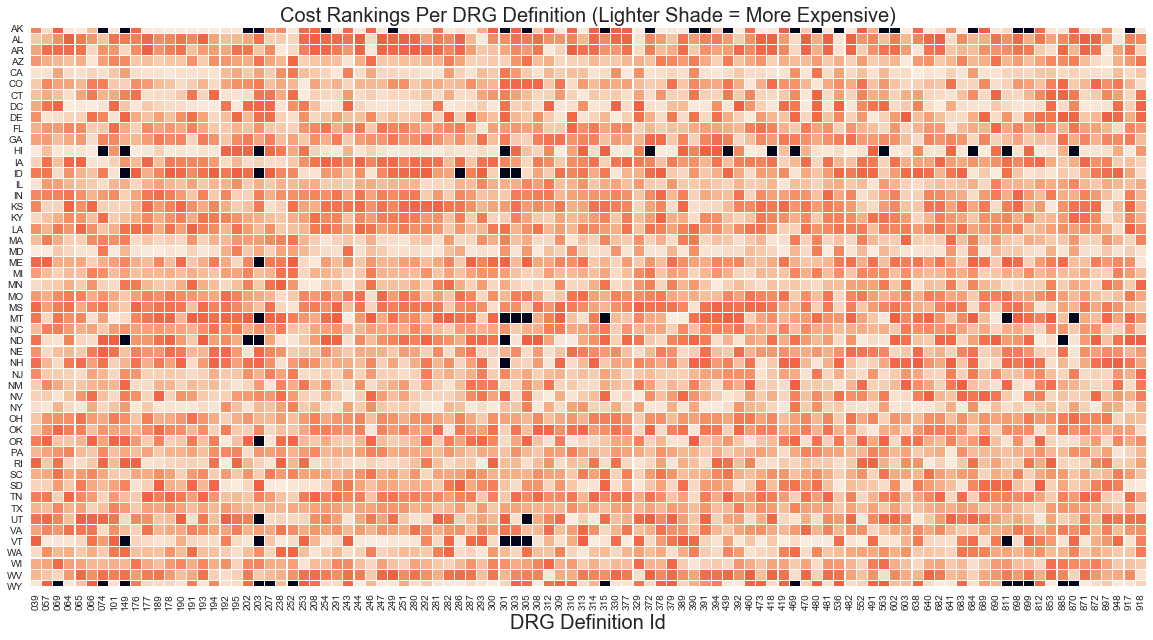

In [53]:
# build heatmap to see which state charges the most for each DRG
plt.figure(figsize=(20,20))
sns.heatmap(_df, square=True, vmin=-100, cbar=False, linewidths=0.1)
plt.title("Cost Rankings Per DRG Definition (Lighter Shade = More Expensive)", fontsize=20)
plt.xlabel("DRG Definition Id", fontsize=20)

Explore more with these four states:CA, NY, MD, DC where treatments are pretty expensive; and MT/IA state where treatements are relatively cheap

Something wrong the zipcode of CA and MD, so here we will mainly talk about NY state and DC state. In NY state, the closer to the city central, the more expensive the treatment is (especially Manhanttan and LIC). The first map also shows that the medical providers are all over NY state, suggesting that the medical resource is pretty adequate in this state. On the contrary, in DC state, medical resources are not so abundant, just concentrated in some regions, but still pretty expensive in each region. In IA state, the providers are scattered, the tratements in east citys are relatively expensive.

In [54]:
df['Provider Zip Code'] = df['Provider Zip Code'].apply(lambda x:int(x))
from pyzipcode import ZipCodeDatabase
zcdb = ZipCodeDatabase() 

In [55]:
#Firstly, to explore NY state
df20 = df.loc[(df['Provider State']=='NY')]

In [56]:
df20['latitude'] = df20['Provider Zip Code'].apply(lambda x:zcdb[x].latitude)
df20['longitude'] = df20['Provider Zip Code'].apply(lambda x:zcdb[x].longitude)

In [57]:
import plotly.express as px
fig = px.density_mapbox(df20, lat='latitude', lon='longitude', z='Average Total Payments($)', radius=10,
                        center=dict(lat=0, lon=180), zoom=0,
                        mapbox_style="stamen-terrain")
fig.show()

#you can zoom in

In [58]:
#Then, to explore DC state
df21 = df.loc[(df['Provider State']=='DC')]

In [59]:
df21['latitude'] = df21['Provider Zip Code'].apply(lambda x:zcdb[x].latitude)
df21['longitude'] = df21['Provider Zip Code'].apply(lambda x:zcdb[x].longitude)

In [60]:
import plotly.express as px
fig = px.density_mapbox(df21, lat='latitude', lon='longitude', z='Average Total Payments($)', radius=10,
                        center=dict(lat=0, lon=180), zoom=0,
                        mapbox_style="stamen-terrain")
fig.show()
#you can zoom in

In [61]:
#Then, to explore MT state
df22 = df.loc[(df['Provider State']=='IA')]

In [62]:
df22['latitude'] = df22['Provider Zip Code'].apply(lambda x:zcdb[x].latitude)
df22['longitude'] = df22['Provider Zip Code'].apply(lambda x:zcdb[x].longitude)

In [63]:
import plotly.express as px
fig = px.density_mapbox(df22, lat='latitude', lon='longitude', z='Average Total Payments($)', radius=10,
                        center=dict(lat=0, lon=180), zoom=0,
                        mapbox_style="stamen-terrain")
fig.show()

#### Explore the most common DRG

In [64]:
conn = sqlite3.connect('hospital_charges.db')

total_discharges_by_drg = dict()
for drg in df['DRG Definition'].unique():

    query = """
        SELECT `Provider State` as providerState, SUM(`Total Discharges`) as numDischarges
        FROM hospital_charges
        WHERE `DRG Definition` = '{drg}' 
        GROUP BY `Provider State`
    """.format(drg=drg)
    
    cursor = conn.execute(query)
    total_discharges_by_drg[drg] = [(record[0], record[1]) for record in cursor]
    
conn.close()

In [65]:
_df = pd.DataFrame(index=df['Provider State'].unique())
for k,v in total_discharges_by_drg.items():
    t = pd.DataFrame(v, columns=['State', 'Total_Discharges'])
    t.set_index(['State'], inplace=True)
    _df = pd.merge(left=_df, right=t, how='left', left_index=True, right_index=True)
_df.columns = drg_by_id.keys()
_df.fillna(0, inplace=True)

Text(0.5, 424.6, 'DRG Definition Id')

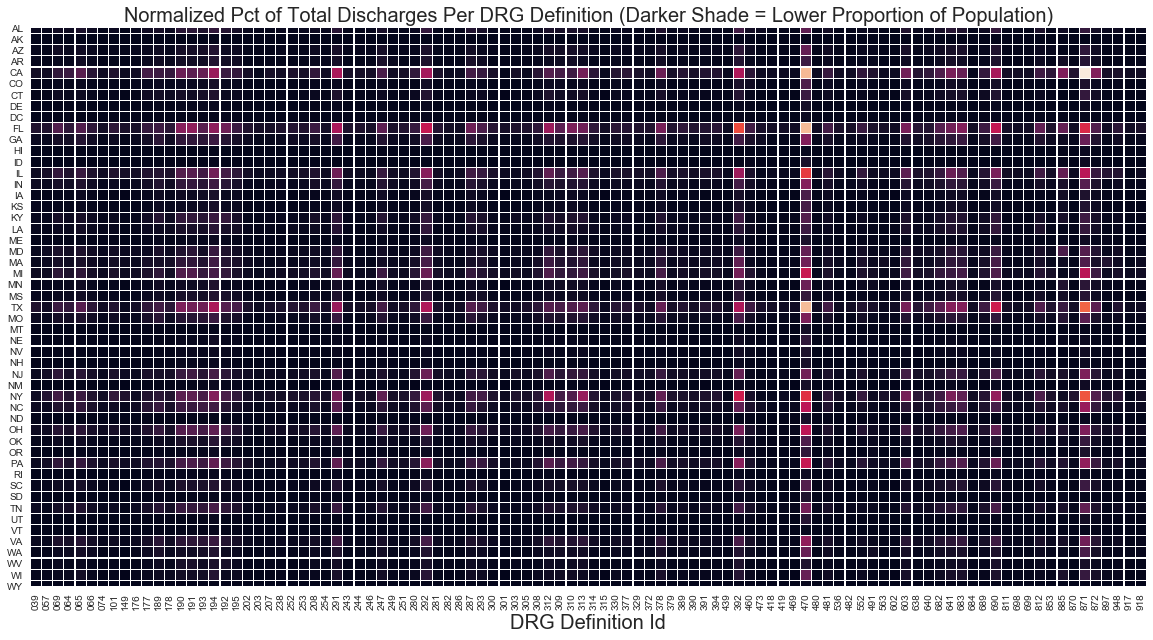

In [66]:
normalized_df = _df.divide(_df.sum(axis=1), axis=0)

plt.figure(figsize=(20,20))
sns.heatmap(_df, square=True, vmin=0, cbar=False, linewidths=0.1)
plt.title("Normalized Pct of Total Discharges Per DRG Definition (Darker Shade = Lower Proportion of Population)", fontsize=20)
plt.xlabel("DRG Definition Id", fontsize=20)

From the figure above, we can find that 039 is quite common. Let's take it as an example to explore further

From the map below ,we could easily find that 039 DRG type almost appears in each state. but it is much more common in CA,TX,FL state. And this treatment is well covered by Medicare in CA, NV, NM, but in TX, the covered amount is relatively less. This may be because the treatments for 039 in CA, NM are expensive but relatively cheap in TX. However, it is also noteworthy that 039 treatment is also very expensive in NY, MD, HI,VT, WY, but the average covered charges in these regions are very low, this may be caused by the fact that this DRG type is relatively less common in these states.

In [67]:
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True) 

In [68]:
# for DRG 039
df039 = df[df['DRG Definition']=='039 - EXTRACRANIAL PROCEDURES W/O CC/MCC']

In [69]:
#Total Discharges by State for 039 DRG',
data = dict(type='choropleth',
            colorscale = 'Viridis',
            reversescale = True,
            locations = df039['Provider State'],
            z = df039['Total Discharges by DRG by State_x'],
            locationmode = 'USA-states',
            text = df039['Provider State'],
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 1)),
            colorbar = {'title':"Total Discharges"}
            ) 

In [70]:
layout = dict(title = 'Total Discharges by State for 039 DRG',
              geo = dict(scope='usa',
                         showlakes = True,
                         lakecolor = 'rgb(85,173,240)')
             )

In [71]:
choromap1 = go.Figure(data = [data],layout = layout)
choromap1

In [72]:
#Avg Covered Charges per discharge by DRG by State for 039 DRG
data2 = dict(type='choropleth',
            colorscale = 'Viridis',
            reversescale = True,
            locations = df039['Provider State'],
            z = df039['Average Covered Charges per discharge by DRG by State'],
            locationmode = 'USA-states',
            text = df039['Provider State'],
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 1)),
            colorbar = {'title':"Average Covered Charges per discharge"}
            ) 

In [73]:
layout2 = dict(title = 'Avg Covered Charges per discharge for 039 DRG',
              geo = dict(scope='usa',
                         showlakes = True,
                         lakecolor = 'rgb(85,173,240)')
             )

In [74]:
choromap2 = go.Figure(data = [data2],layout = layout2)
choromap2

In [75]:
#Avg Covered Charges per discharge by DRG by State for 039 DRG
data3 = dict(type='choropleth',
            colorscale = 'Viridis',
            reversescale = True,
            locations = df039['Provider State'],
            z = df039['mean - Average Total Payments by DRG by State'],
            locationmode = 'USA-states',
            text = df039['Provider State'],
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 1)),
            colorbar = {'title':"mean - Average Total Payments"}
            ) 

layout3 = dict(title = 'mean - Average Total Payments for 039 DRG',
              geo = dict(scope='usa',
                         showlakes = True,
                         lakecolor = 'rgb(85,173,240)')
             )

In [76]:
choromap3 = go.Figure(data = [data3],layout = layout3)
choromap3

Back to the part2, we have discovered some providers with above-average total numbers of discharges.
Then, we could check their avg covered charges per discharge and their medicare coverage rate

#### 3. check Medicare coverage rate 

Only WAKEMED, CARY HOSPITAL is 100% covered by Medicare for 372 DRG. Then we could look at closely how is the average coverage rate for this type of DRG and how this provider perfermed for other types of DRG. From the bar chart, we could find that the average Medicare Coverage rate in NC state where WAKEMED, CARY HOSPITAL serve with 100% coverage rate is about 80% and not the highest. Therefore, WAKEMED, CARY HOSPITAL is suspicious.  We can learn from the third and forth bar chart, this provider tend to cover more for relative more expensive treatments and there is one treatment's coverage rate (372 maybe) is pretty 'outsatnding'. Therefore, it is better to investigate if this provider commit fruad mainly for 372 DRG.

In [77]:
df[df['Medicare Coverage rate'] >=1]

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges($),...,Total Discharges by DRG by State_y,sum - Average Covered Charges by DRG by State,Average Covered Charges per discharge by DRG by State,diff avg covered charges per discharge by DRG,diff avg covered charges per discharge by DRG by State,sum - Average Total Payments by Provider,sum - Average Total Payments by DRG,sum - Average Total Payments by DRG by State,mean - Average Total Payments by DRG,mean - Average Total Payments by DRG by State
90877,372 - MAJOR GASTROINTESTINAL DISORDERS & PERIT...,340173,"WAKEMED, CARY HOSPITAL",1900 KILDARE FARM ROAD,CARY,NC,27511,NC - Raleigh,13,22776.61,...,932,770711.9,826.944099,440.191512,925.102824,567342.84,10785340.38,339522.1,8747.234696,8705.694872


In [78]:
df372 = df[df['DRG Definition'] == '372 - MAJOR GASTROINTESTINAL DISORDERS & PERITONEAL INFECTIONS W CC']

In [79]:
table372 = df372.groupby(['Provider State'])['Medicare Coverage rate'].apply(lambda x : x.astype(float).mean())
df372 = table372.to_frame()
df372.reset_index(inplace=True)
df372 = df372.rename(columns={'Medicare Coverage rate': 'mean - Medicare Coverage rate by State'})

Text(0.5, 0, 'Provider State')

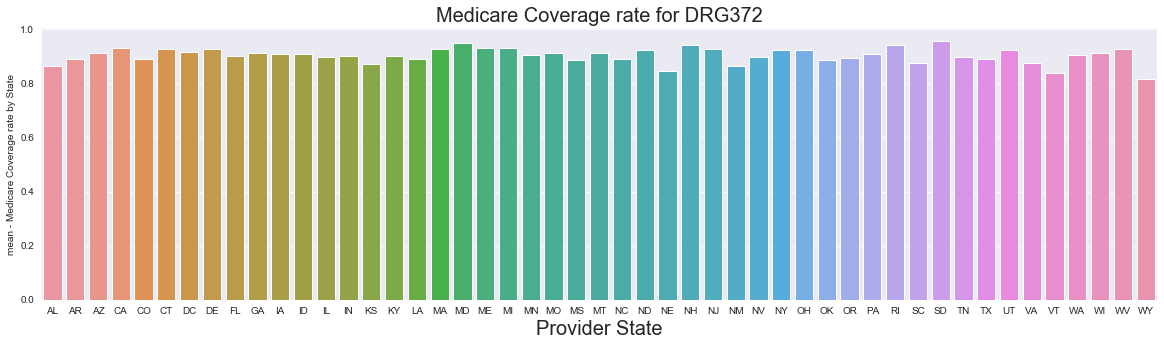

In [80]:
plt.figure(figsize=(20,5))
sns.barplot(x='Provider State', y='mean - Medicare Coverage rate by State', data=df372)
plt.title('Medicare Coverage rate for DRG372', fontsize=20)
plt.xlabel('Provider State', fontsize=20)

In [137]:
table25 = df.groupby(['DRG Definition', 'Provider State'])['Medicare Coverage rate'].apply(lambda x : x.astype(float).mean())
df25 = table25.to_frame()
df25.reset_index(inplace=True)
df25 = df25.rename(columns={'Medicare Coverage rate': 'mean - Medicare Coverage rate by DRG by State'})

df = pd.merge(df, df25, on=['DRG Definition', 'Provider State'], how='left')

In [138]:
dfwch = df[df['Provider Name'] == 'WAKEMED, CARY HOSPITAL']
dfwch.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges($),...,sum - Average Covered Charges by DRG by State,Average Covered Charges per discharge by DRG by State,diff avg covered charges per discharge by DRG,diff avg covered charges per discharge by DRG by State,sum - Average Total Payments by Provider,sum - Average Total Payments by DRG,sum - Average Total Payments by DRG by State,mean - Average Total Payments by DRG,mean - Average Total Payments by DRG by State,mean - Medicare Coverage rate by DRG by State
1953,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,340173,"WAKEMED, CARY HOSPITAL",1900 KILDARE FARM ROAD,CARY,NC,27511,NC - Raleigh,24,20385.08,...,684357.66,641.384873,-116.913804,207.993460,567342.84,8054238.01,250186.04,6706.276445,6415.026667,0.849416
3448,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,340173,"WAKEMED, CARY HOSPITAL",1900 KILDARE FARM ROAD,CARY,NC,27511,NC - Raleigh,17,40526.70,...,1635679.91,626.937489,1086.695522,1756.986040,567342.84,22004682.41,646700.97,13263.823032,12201.905094,0.917210
5496,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,340173,"WAKEMED, CARY HOSPITAL",1900 KILDARE FARM ROAD,CARY,NC,27511,NC - Raleigh,58,29754.60,...,1543017.23,353.093188,-115.831930,159.917157,567342.84,17976540.82,578828.11,7922.671141,7420.873205,0.859880
7460,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,340173,"WAKEMED, CARY HOSPITAL",1900 KILDARE FARM ROAD,CARY,NC,27511,NC - Raleigh,29,21971.13,...,1027087.82,442.519526,-5.303833,315.105646,567342.84,10319457.31,339264.44,5713.985221,5385.149841,0.783588
9351,069 - TRANSIENT ISCHEMIA,340173,"WAKEMED, CARY HOSPITAL",1900 KILDARE FARM ROAD,CARY,NC,27511,NC - Raleigh,56,22689.37,...,947946.92,334.608867,-117.332692,70.558455,567342.84,9944680.10,303070.09,5068.644292,4810.636349,0.776179


Text(0.5, 0, 'DRG Definition')

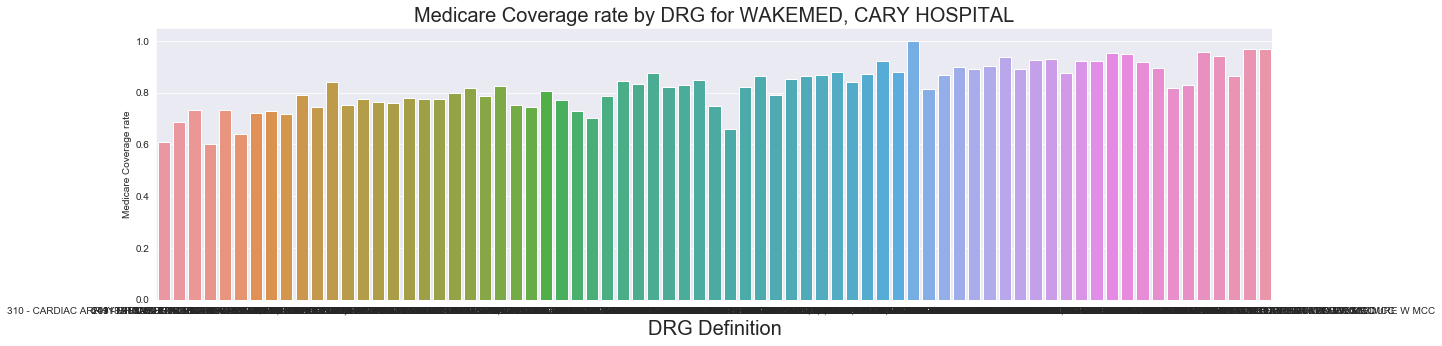

In [82]:
# sort by average total payments, ascending from left to right
plt.figure(figsize=(20,5))
sns.barplot(x='DRG Definition', y='Medicare Coverage rate', data=dfwch.sort_values('mean - Average Total Payments by DRG'))
plt.title('Medicare Coverage rate by DRG for WAKEMED, CARY HOSPITAL', fontsize=20)
plt.xlabel('DRG Definition', fontsize=20)

Text(0.5, 0, 'DRG Definition')

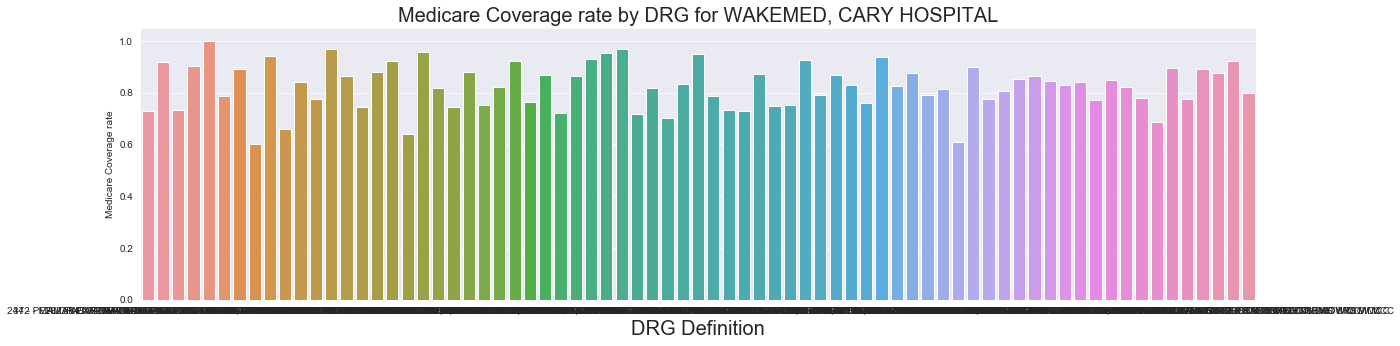

In [83]:
# sort by total discharges, ascending from left to right
plt.figure(figsize=(20,5))
sns.barplot(x='DRG Definition', y='Medicare Coverage rate', data=dfwch.sort_values('Total Discharges'))
plt.title('Medicare Coverage rate by DRG for WAKEMED, CARY HOSPITAL', fontsize=20)
plt.xlabel('DRG Definition', fontsize=20)

In [140]:
dfwch['diff Medicare Coverage rate by DRG by State'] = dfwch['Medicare Coverage rate'] - dfwch['mean - Medicare Coverage rate by DRG by State']

Text(0.5, 0, 'DRG Definition')

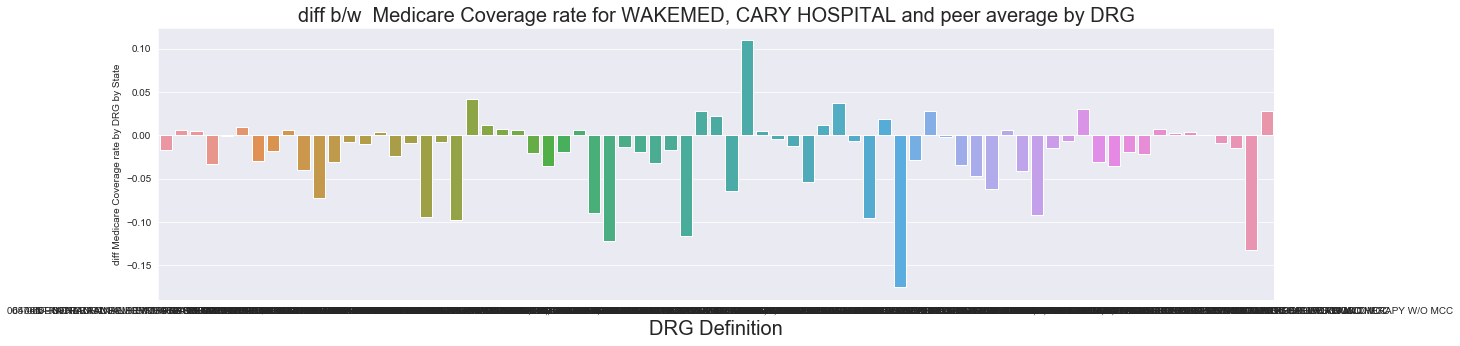

In [141]:
plt.figure(figsize=(20,5))
sns.barplot(x='DRG Definition', y='diff Medicare Coverage rate by DRG by State', data=dfwch)
plt.title('diff b/w  Medicare Coverage rate for WAKEMED, CARY HOSPITAL and peer average by DRG', fontsize=20)
plt.xlabel('DRG Definition', fontsize=20)

#### 4. 'Steal a little,  all the time' fraud and ' hit and run' fruad

Take an example of '039 - EXTRACRANIAL PROCEDURES W/O CC/MCC'DRG as an example as follows: first we extract providers whoes both average number and amount of bills per symptom are much higher than those billed by other physicians. Then, we could find out CAROLINAS HOSPITAL SYSTEM has a much higher total discharges than peer average and the averag covered charges per discharge is much higher than peer average as well. Therefore, it is more likely to commit fraud of Unbundling or Excessive or Unnecessary Services and we need to have a closer look.

In [84]:
df['diff avg covered charges per discharge by DRG'].groupby(df['DRG Definition']).describe().head(5)

,count,mean,std,min,25%,50%,75%,max
DRG Definition,,,,,,,,
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,1079.0,459.443231,1198.314532,-922.743638,-378.950118,124.330724,917.485182,10320.688498
057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/O MCC,1201.0,273.686443,960.186517,-858.667066,-333.351065,20.900363,576.534292,8915.607094
064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W MCC,1659.0,626.049672,1653.458848,-1155.446862,-464.194912,159.441992,1176.772064,14770.931159
065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W CC,2269.0,354.969060,861.317495,-564.792691,-209.472884,102.947309,654.903879,7426.975503
066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W/O CC/MCC,1806.0,257.477255,772.703453,-703.078312,-261.036422,44.062889,534.555598,7653.580995


In [85]:
# select out the provider whose average covered charge per discharge is more than $500 higher than other peers 
df.loc[(df['DRG Definition']=='039 - EXTRACRANIAL PROCEDURES W/O CC/MCC') & (df['Diff Total Discharge by DRG']>0) & (df['diff avg covered charges per discharge by DRG']>500), 'Diff Total Discharge by DRG']
# then we could find there is 11 which is outstanding, then look closely at it

9       2.854495
19      1.854495
79      2.854495
106     0.854495
115     3.854495
125     8.854495
239     6.854495
631     0.854495
873    11.854495
Name: Diff Total Discharge by DRG, dtype: float64

In [86]:
df.loc[(df['DRG Definition']=='039 - EXTRACRANIAL PROCEDURES W/O CC/MCC') & (df['Diff Total Discharge by DRG']>11) & (df['diff avg covered charges per discharge by DRG']> 500)]

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges($),...,Total Discharges by DRG by State_y,sum - Average Covered Charges by DRG by State,Average Covered Charges per discharge by DRG by State,diff avg covered charges per discharge by DRG,diff avg covered charges per discharge by DRG by State,sum - Average Total Payments by Provider,sum - Average Total Payments by DRG,sum - Average Total Payments by DRG by State,mean - Average Total Payments by DRG,mean - Average Total Payments by DRG by State
873,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,420091,CAROLINAS HOSPITAL SYSTEM,805 PAMPLICO HWY BOX 100550,FLORENCE,SC,29505,SC - Florence,43,72954.62,...,721,643419.21,892.39835,717.922952,804.22072,812373.33,7510416.19,127942.18,6960.534004,6733.798947


In [87]:
#Then we compare this provider with other peers in SC state (for 039)
df31 = df.loc[(df['DRG Definition']=='039 - EXTRACRANIAL PROCEDURES W/O CC/MCC') & (df['Provider State'] == 'SC')]

However, when we have a closer look, we could find that AIKEN REGIONAL MEDICAL CENTER has noticeably highest average covered charges per discharge, then we will investigate this provider. Then, we could find out that this provider only serves in AIKEN in SC state and it covers 79 types of DRG. Therefore, we will firstly look at how other providers perform in SC. Then we could find out that in SC state there are 56 different providers scatted in different cities.Then, we could investigate if the overall average covered charge and cost of DRG is higher than other districts and if other treatments in AIKEN REGIONAL MEDICAL CENTER are also higher than peer providers in SC. Back to the figure 'cost ranking per DRG', we could find the cost of different treatments are not consistent in SC. 

In [95]:
#So just to make it easier to view we're using plotly here
fig9 = px.bar(df31, x='Provider Name', y='Average Covered Charges per Discharge by Provider')
fig9.update_layout(title={
        'text': 'Average Covered Charges per Discharge for 039 in SC',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},xaxis_title='Provider Name',yaxis_title='Average Covered Charges per Discharge')
fig9.show()

In [98]:
dfARMC = df.loc[df['Provider Name'] == 'AIKEN REGIONAL MEDICAL CENTER']

In [100]:
dfARMC.describe(include=['O'])

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Hospital Referral Region Description,DRG Code
count,79,79,79,79,79,79,79,79
unique,79,1,1,1,1,1,1,79
top,872 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...,420082,AIKEN REGIONAL MEDICAL CENTER,302 UNIVERSITY PARKWAY,AIKEN,SC,GA - Augusta,811
freq,1,79,79,79,79,79,79,1


In [107]:
dfAiken = df.loc[ (df['Provider State'] == 'SC')]
dfAiken.describe(include=['O'])

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Hospital Referral Region Description,DRG Code
count,2847,2847,2847,2847,2847,2847,2847,2847
unique,100,56,56,56,45,1,8,100
top,690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,420051,MCLEOD REGIONAL MEDICAL CENTER-PEE DEE,101 E WOOD ST,CHARLESTON,SC,SC - Columbia,292
freq,54,99,99,99,336,2847,740,54


Finally, from the following two figures, we could find that each treatment in AIKEN REGIONAL MEDICAL CENTER are more expensive than other providers in the same state, and this provider's covered charges for each treatment is also higher than state peer average. Therefore, it is worthy investigating more about this provider to see if it commits 'Upcoding' fraud.

Text(0.5, 0, 'DRG Definition')

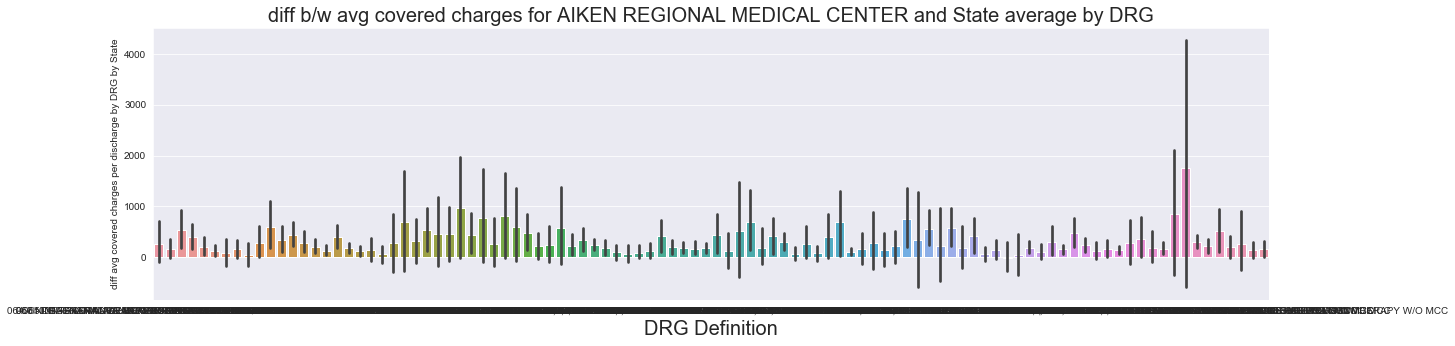

In [131]:
# to look at how each tratements in AIKEN REGIONAL MEDICAL CENTER is covered compared with state average
plt.figure(figsize=(20,5))
sns.barplot(x='DRG Definition', y='diff avg covered charges per discharge by DRG by State', data=dfAiken)
plt.title('diff b/w avg covered charges for AIKEN REGIONAL MEDICAL CENTER and State average by DRG', fontsize=20)
plt.xlabel('DRG Definition', fontsize=20)

In [133]:
dfAiken['diff Average Total Payments by DRG by State'] = dfAiken['Average Total Payments($)'] - dfAiken['mean - Average Total Payments by DRG by State']

Text(0.5, 0, 'DRG Definition')

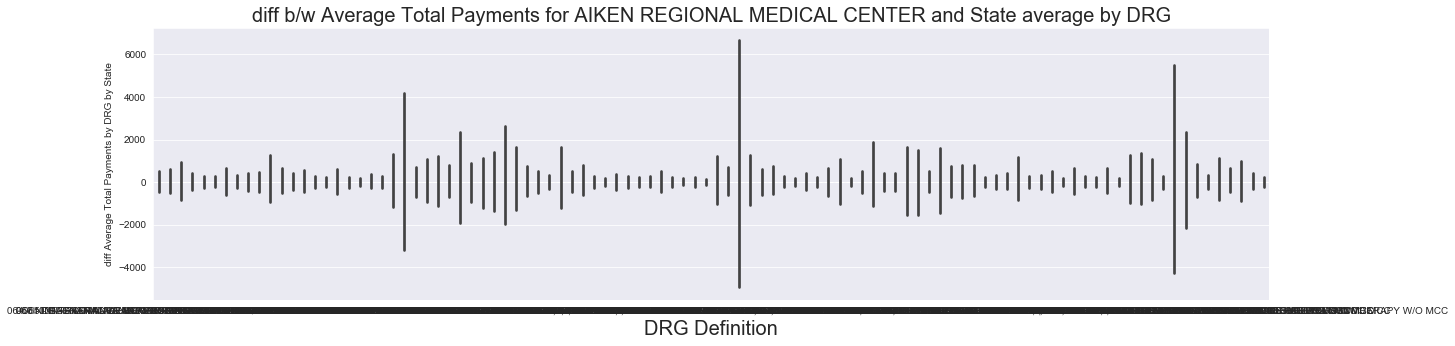

In [134]:
plt.figure(figsize=(20,5))
sns.barplot(x='DRG Definition', y='diff Average Total Payments by DRG by State', data=dfAiken)
plt.title('diff b/w Average Total Payments for AIKEN REGIONAL MEDICAL CENTER and State average by DRG', fontsize=20)
plt.xlabel('DRG Definition', fontsize=20)

Additionally, UNIVERSITY OF CALIFORNIA DAVIS MEDICAL CENTER is also highly risky, its average covered charge is pretty higher with pretty less number of discharges. And from the second bar chart, we could find the cost of each treatment in UNIVERSITY OF CALIFORNIA DAVIS MEDICAL CENTER is much higher than the peer average. Therefore, this provider is highly likely to commit the 'hit and run' fraud. 

In [283]:
df.loc[(df['DRG Definition']=='039 - EXTRACRANIAL PROCEDURES W/O CC/MCC')  & (df['diff avg covered charges per discharge by DRG']>10000)]

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges($),...,Total Discharges by State,Average Discharges by State by City,Total Discharges by State by City,% discharges by provider by state by city,Medicare Coverage rate,Average Covered Charges per discharge,Total Discharges by DRG,Total Average Covered Charges by DRG,Average Covered Charges per discharge by DRG,diff avg covered charges per discharge by DRG
123,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,50599,UNIVERSITY OF CALIFORNIA DAVIS MEDICAL CENTER,2315 STOCKTON BOULEVARD,SACRAMENTO,CA,95817,CA - Sacramento,13,146892.0,...,474979,39.326409,13253,0.265827,0.847488,11299.384615,33606,32889536,978.680474,10320.704142


In [147]:
###then we could look closely at this provider
dfucd = df[df['Provider Name'] == 'UNIVERSITY OF CALIFORNIA DAVIS MEDICAL CENTER']

In [148]:
# Then we could look at its average total payments compared with peer average
dfucd['diff Average Total Payments by DRG by State'] = dfucd['Average Total Payments($)'] - dfucd['mean - Average Total Payments by DRG by State']

Text(0.5, 0, 'DRG Definition')

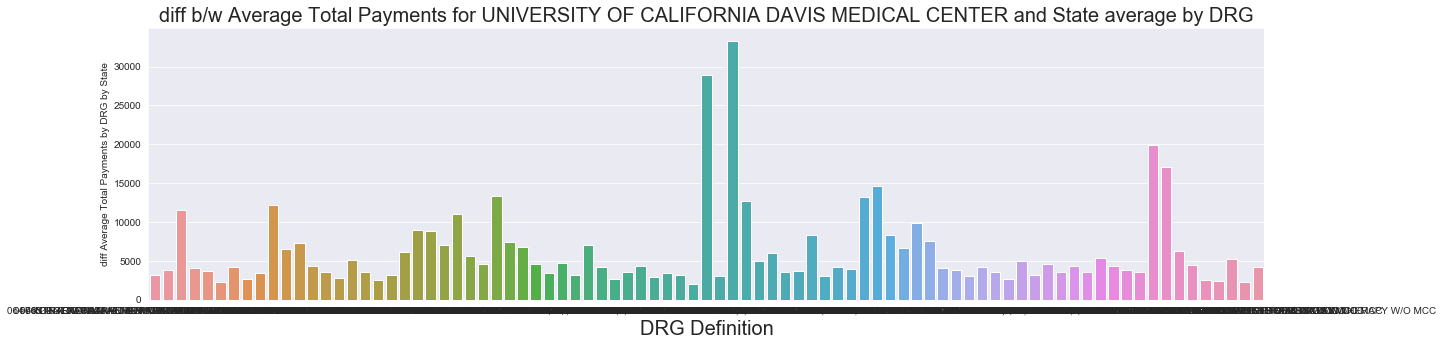

In [149]:
plt.figure(figsize=(20,5))
sns.barplot(x='DRG Definition', y='diff Average Total Payments by DRG by State', data=dfucd)
plt.title('diff b/w Average Total Payments for UNIVERSITY OF CALIFORNIA DAVIS MEDICAL CENTER and State average by DRG', fontsize=20)
plt.xlabel('DRG Definition', fontsize=20)

The following providers are also weired, since they got pretty lower average covered charges per discharge than peer average but has pretty higher total discharges. Therefore, it may commit 'steal a little, all the time' like Kickbacks. Or this is caused by state difference. 

In [285]:
df.loc[(df['DRG Definition']=='039 - EXTRACRANIAL PROCEDURES W/O CC/MCC') & (df['Diff Total Discharge by DRG'] > 100) &  (df['diff avg covered charges per discharge by DRG'] < -800)]

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges($),...,Total Discharges by State,Average Discharges by State by City,Total Discharges by State by City,% discharges by provider by state by city,Medicare Coverage rate,Average Covered Charges per discharge,Total Discharges by DRG,Total Average Covered Charges by DRG,Average Covered Charges per discharge by DRG,diff avg covered charges per discharge by DRG
394,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,170186,KANSAS HEART HOSPITAL,3601 NORTH WEBB ROAD,WICHITA,KS,67226,KS - Wichita,190,11746.63,...,61800,56.812057,16021,0.051745,0.808443,61.824368,33606,32889536,978.680474,-916.856105
679,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,330140,ST JOSEPH'S HOSPITAL HEALTH CENTER,301 PROSPECT AVENUE,SYRACUSE,NY,13203,NY - Syracuse,137,13836.72,...,435557,53.592357,16828,0.455966,0.819874,100.997956,33606,32889536,978.680474,-877.682518
795,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,370215,OKLAHOMA HEART HOSPITAL,4050 WEST MEMORIAL ROAD,OKLAHOMA CITY,OK,73120,OK - Oklahoma City,170,20634.97,...,97292,47.202443,27047,0.129330,0.800935,121.382176,33606,32889536,978.680474,-857.298297
1044,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,510022,CHARLESTON AREA MEDICAL CENTER,501 MORRIS STREET,CHARLESTON,WV,25301,WV - Charleston,132,18763.15,...,64968,83.909836,10237,0.912963,0.790470,142.145076,33606,32889536,978.680474,-836.535398


Similarly, we could use the above steps to explore other suspicious provider for each treatment.The above is all about my Analysis this time. Thank you.